In [1]:
import json
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np

with (open('data/DC/tokens.json') as data):
    data = json.load(data)

def diff_checker(data1,data2, epsilon = 5):
    """
    display overview of how the two surprisal datasets differ per layer and return a list of tokens which differ by more than epsilon
    :param data1: json dataset generated by run_gpt2.py
    :param data2: json dataset generated by run_gpt2.py
    :param epsilon: the minimum difference between values to return the corresponding position
    :return: list of tokens with position within a layer for which the difference between surprisal was higher than epsilon
    """
    outliers = dict()
    for layer_id in data1.keys():
        layer_outliers = list()
        avg_per_sentence = list()
        avg = list()
        for article_id, article in data1[layer_id].items():
            for i in range(len(article)):
                diff = [x - y for x, y in zip(data1[layer_id][article_id][i], data2[layer_id][article_id][i])]
                avg_per_sentence.append(sum(diff)/len(article[i]))
                avg.extend(diff)
                layer_outliers.extend([[article_id,i,x] for x in diff if abs(x)>epsilon])
        if len(layer_outliers)>0:
                outliers[layer_id] = layer_outliers

        table = PrettyTable()
        table.align = 'l'
        table.field_names = ["", "per sentence", "per token"]
        table.add_row(['average',sum(avg_per_sentence)/len(avg_per_sentence),sum(avg)/len(avg)])
        table.add_row(['min',min(avg_per_sentence),min(avg)])
        table.add_row(['max',max(avg_per_sentence),max(avg)])
        print(f'Layer: {layer_id}')
        print(table)
    return outliers

def visualise_diff(source1,source2,layer_id,article,sentence, label1='data1', label2='data2'):
    """
    display a graph that plots surprisal values for each token in a sentence from two runs on the same dataset
    :param source1: json dataset generated by run_gpt2.py
    :param source2: json dataset generated by run_gpt2.py
    :param layer_id: LM layer at which we want to see the value
    :param article: index of an article within the dataset
    :param sentence: index of a sentence within the article
    """
    data1 = source1[str(layer_id)][str(article)][sentence]
    data2 = source2[str(layer_id)][str(article)][sentence]
    words = data[str(article)][sentence]

    x = np.arange(len(words))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, data1,width, label=label1)
    plt.bar(x + width/2, data2,width, label=label2)
    plt.legend()
    plt.xticks(x, words,rotation=90)
    plt.tight_layout()
    plt.show()

## NNsight


In [2]:
with (open('results/logit-lens/DC/gpt2/colab_surprisal.json') as colab,
      open('results/logit-lens/DC/gpt2/nn_surprisal.json') as nn):
    colab = json.load(colab)
    nn = json.load(nn)
diff_checker(colab,nn)


Layer: 0
+---------+-------------------------+------------------------+
|         | per sentence            | per token              |
+---------+-------------------------+------------------------+
| average | -1.3240339546242286e-06 | -9.660688828667681e-07 |
| min     | -4.57763671875e-05      | -0.0002288818359375    |
| max     | 1.0081699916294643e-05  | 0.00018310546875       |
+---------+-------------------------+------------------------+
Layer: 1
+---------+------------------------+------------------------+
|         | per sentence           | per token              |
+---------+------------------------+------------------------+
| average | 0.00014161451655167698 | 0.00013294179928138332 |
| min     | -1.1444091796875e-05   | -4.00543212890625e-05  |
| max     | 0.000518798828125      | 0.0015411376953125     |
+---------+------------------------+------------------------+
Layer: 2
+---------+------------------------+------------------------+
|         | per sentence           |

{}

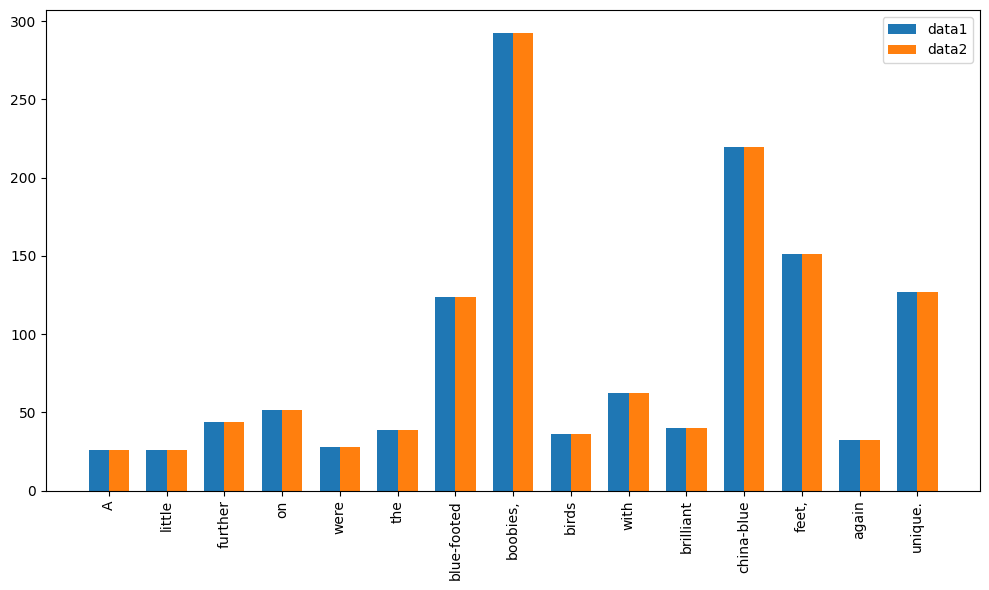

In [3]:
visualise_diff(colab,nn,0,1,4)

## TransformerLens

In [5]:
with (open('results/logit-lens/DC/gpt2/colab_surprisal.json') as colab,
      open('results/logit-lens/DC/gpt2/tl_surprisal.json') as tl):
    colab = json.load(colab)
    tl = json.load(tl)
diff_checker(colab,tl)


Layer: 0
+---------+-------------------------+-------------------------+
|         | per sentence            | per token               |
+---------+-------------------------+-------------------------+
| average | -8.119612580384565e-08  | -1.3193184613416826e-07 |
| min     | -2.4318695068359375e-05 | -0.0002288818359375     |
| max     | 1.18255615234375e-05    | 0.0001678466796875      |
+---------+-------------------------+-------------------------+
Layer: 1
+---------+------------------------+------------------------+
|         | per sentence           | per token              |
+---------+------------------------+------------------------+
| average | 0.00014108691804850677 | 0.00013247103405895734 |
| min     | -1.52587890625e-05     | -3.4332275390625e-05   |
| max     | 0.00049591064453125    | 0.001556396484375      |
+---------+------------------------+------------------------+
Layer: 2
+---------+------------------------+------------------------+
|         | per sentence     

{}

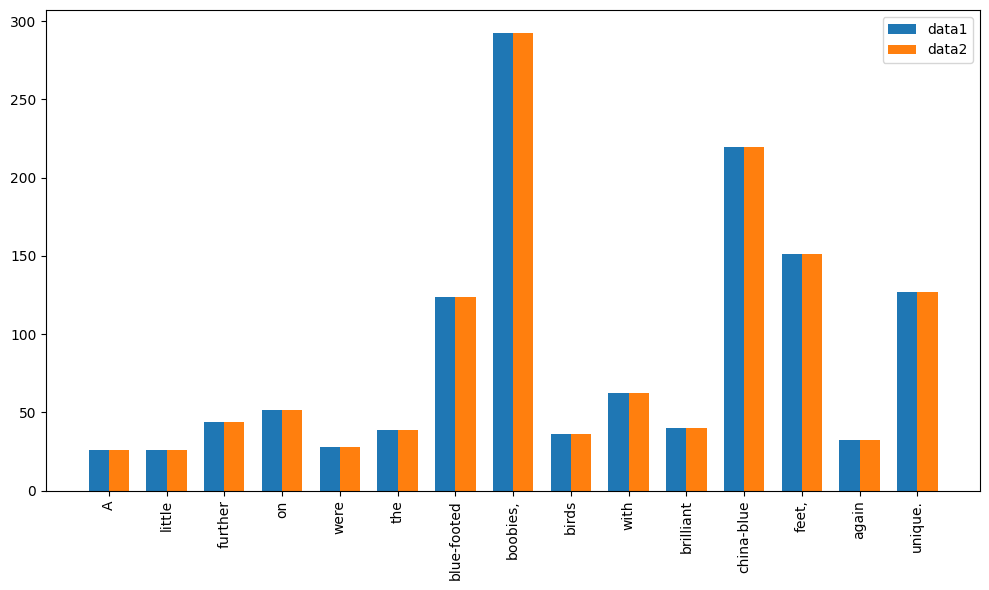

In [6]:
visualise_diff(colab,tl,0,1,4)